#### Linear regression vs Logistic regression
We have used linear regression in previous problem, in this problem we will use logistic regression which is best suited for classification problems, like whether it will rain tomorrow or not

> Identifying whether a problem is classication problem or regression problem is the first step in machine learning

##### Classification problem

Problems where each inputs are assigned a discrete category(also called labels or class) are known as classification

Example:
- Rainfall prediction
- Breast cancer prediction
- Loan repayments prediction
- Handwritten Digit Recognition

##### Regression problem

Probelm where a continuous numeric value must be predicted fot each input are known as regression problems.

Examples:
- Medical Charges prediction
- House pricing Predictions
- Ocean Temperature Predictions
- Wheather Temperature Predictions

#### Linear regression vs Logistic regression
- Linear regression is used for regression problems, where each input is assigned with a weight and then we predict the final value by passing them to the model
- Logistic regression is used for classification problems, where each input is assigned with a weight and then we predict a value z and then we pass this z to the sigmoid function to predict the final classification label where it will belong

- Classification and Regression both are supervised learning algorithms
- Clustering is an unsupervised learning algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
od.version()

'0.1.22'

In [ ]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maheshkrishnam
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


100%|██████████| 3.83M/3.83M [00:00<00:00, 31.2MB/s]

In [ ]:
import os

In [ ]:
data_dir = './weather-dataset-rattle-package'

In [ ]:
os.listdir(data_dir)

['weatherAUS.csv']

In [ ]:
train_csv = data_dir + '/weatherAUS.csv'

In [ ]:
df = pd.read_csv(train_csv)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

- RainTomorrow is the target and RainToday is one of the input that plays a major role in predicting the outcome so will be droping RainTomorrow and RainToday null rows

In [ ]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

In [ ]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           503
Rainfall          679
Evaporation       355
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       545
Pressure3pm       548
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
sns.set(font_scale=0.6)

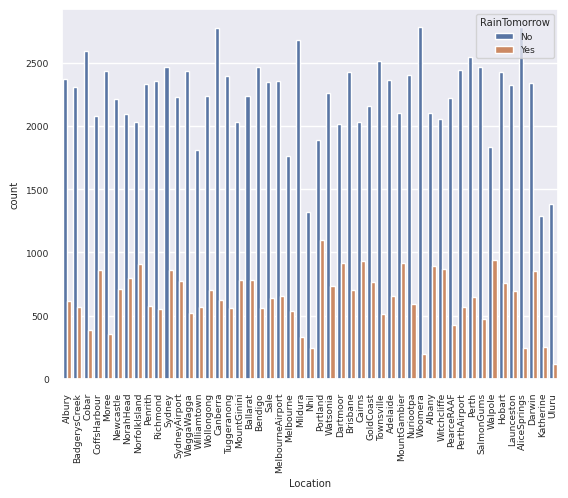

In [ ]:
sns.countplot(df, x='Location', hue='RainTomorrow')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Temp3pm', ylabel='Density'>

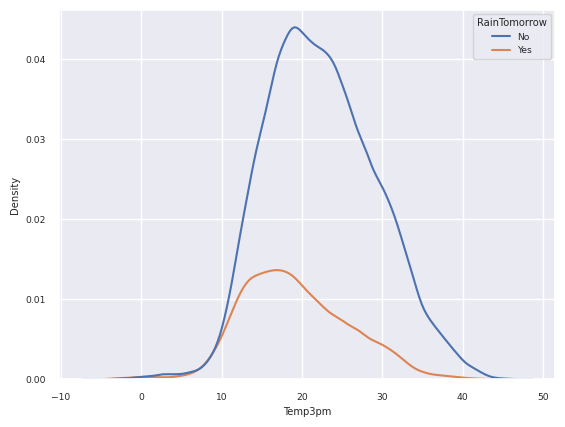

In [ ]:
sns.kdeplot(df, x='Temp3pm', hue='RainTomorrow')

<Axes: xlabel='Temp3pm', ylabel='Count'>

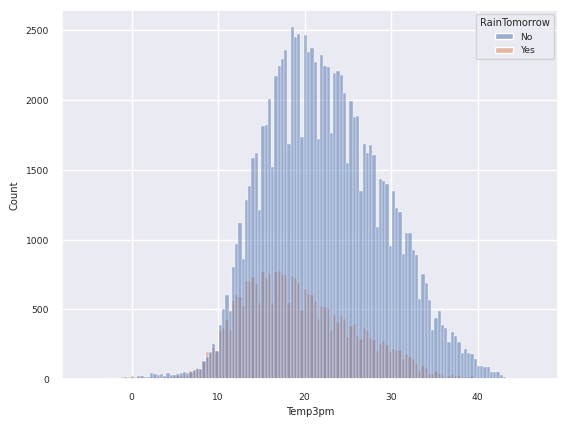

In [ ]:
sns.histplot(df, x='Temp3pm', hue='RainTomorrow')

<Axes: xlabel='RainTomorrow', ylabel='count'>

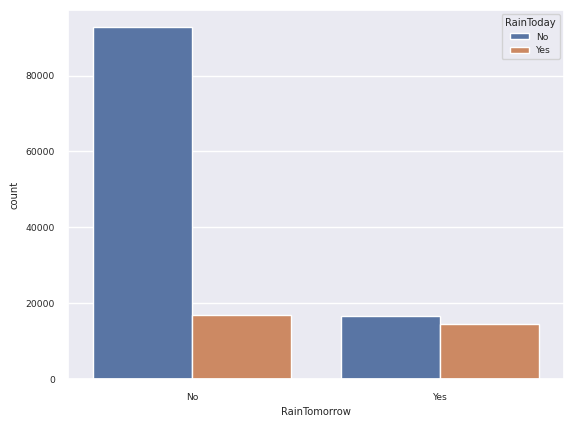

In [ ]:
sns.countplot(df, x='RainTomorrow', hue='RainToday')

- If RainToday == no then it is more possible that RainTomorrow == no

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

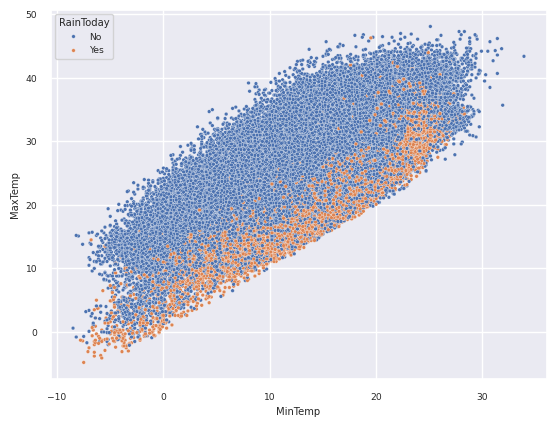

In [ ]:
sns.scatterplot(df, x='MinTemp', y='MaxTemp', hue='RainToday', s=7)

- When there is difference of today's min temperature and max temperature is less than 10 then there is more chances of raining tomorrow
- When today's min temperature is more than 27 deg is there is less chances of raining tomorrow

<Axes: xlabel='Temp3pm', ylabel='Humidity3pm'>

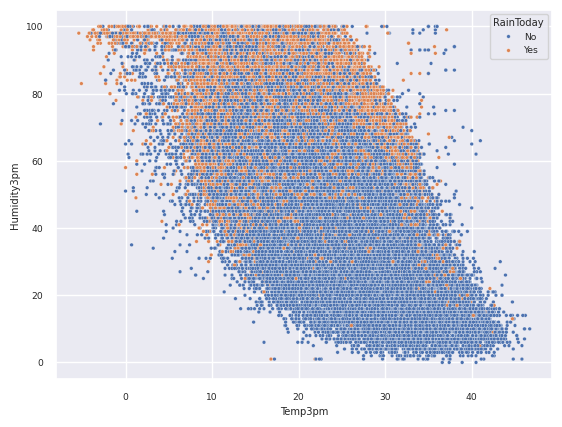

In [ ]:
sns.scatterplot(df, x='Temp3pm', y='Humidity3pm', hue='RainToday', s=7)

- At higher humidity there is more chances of raining tomorrow

#### Working with a Sample
Helpful in very large dataset

In [ ]:
use_sample = False
sample_fraction = 0.1

if use_sample:
  df = df.sample(frac=sample_fraction).copy()

### Best Practices

- Divide dataset into Training set, Validation set and Test set --> (60, 20, 20)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(df, test_size=0.25, random_state=42)
# random_state=42 helps in keeping the same randomly choosen dataset

In [ ]:
train_df.shape, val_df.shape, test_df.shape

((105590, 23), (35197, 23), (28158, 23))

<Axes: xlabel='Date', ylabel='count'>

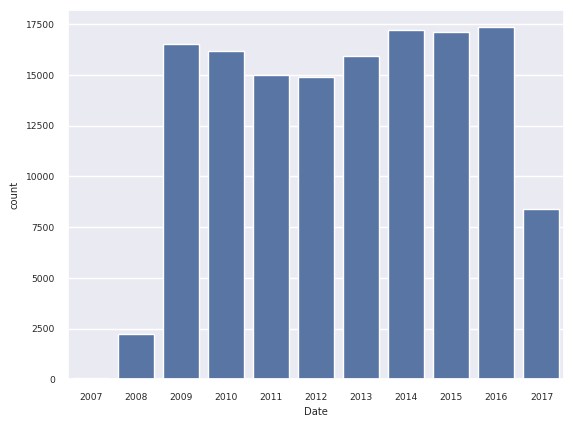

In [ ]:
sns.countplot(df, x=pd.to_datetime(df.Date).dt.year)

In [ ]:
year = pd.to_datetime(df.Date).dt.year
train_df, val_df, test_df = df[year<2015], df[year==2015], df[year>2015]
train_df.shape, val_df.shape, test_df.shape, year

((97988, 23),
 (17089, 23),
 (25710, 23),
 0         2008
 1         2008
 2         2008
 3         2008
 4         2008
           ... 
 145454    2017
 145455    2017
 145456    2017
 145457    2017
 145458    2017
 Name: Date, Length: 140787, dtype: int32)

- When there is an Id column or Date column which is completely unique for each inputs then completely ignore those things.

- Don't use the Target and derived data from target to predict the Target

In [ ]:
input_cols = list(train_df)[1:-1]
target_col = 'RainTomorrow'

input_cols, target_col

(['Location',
  'MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustDir',
  'WindGustSpeed',
  'WindDir9am',
  'WindDir3pm',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm',
  'RainToday'],
 'RainTomorrow')

In [ ]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

In [ ]:
train_inputs.sort_index()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,...,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No
144549,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,...,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No
144550,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,...,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No
144551,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,...,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No


In [ ]:
train_target.sort_index()

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

- We are assuming that we are going to predict the weather of the same locations that we have seen, maybe in future we are gonna predict the locations that we have not covered for that purpose we have to remove the location column to make it unbiased

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=['number']).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

numeric_cols, categorical_cols

(['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'],
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

In [ ]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000,97392.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126,21.540138
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586,6.831612
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000,20.900000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000,26.200000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [ ]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [ ]:
train_inputs[categorical_cols].RainToday.value_counts()

RainToday
No     76002
Yes    21986
Name: count, dtype: int64

#### Inputing Missing Numerical Data
- Whenever you try to compute the target from missing data using a ML algorithm then it will gonna crash
- Genrally missing values are filled with mean, but whenever there are some outliers then we prefer to fill the missing data with median

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# ?SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
df[numeric_cols].isnull().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

- Fits is gonna compute all the required statistics for imputation
- Transform is used to apply the imputation to the dataset

In [ ]:
imputer.fit(df[numeric_cols])
# We have computed the mean on the original dataset so that it can have the best mean, as we have removed some of the rows

SimpleImputer()

In [ ]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
imputer.statistics_

array([  12.18482387,   23.2351203 ,    2.34997407,    5.47251551,
          7.63053986,   39.97051989,   13.99049609,   18.63114078,
         68.82683277,   51.44928835, 1017.65457715, 1015.25796259,
          4.43116082,    4.49925023,   16.98706639,   21.69318269])

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

- In our dataset some of the values are larger and some are smaller in comparision with each other
- If model give some weight to each feature, it may happens that some feature contribute to the error more and some contribute less
- This can create some kind of uneveness in contribution of error by all the features
- So we are going to take all the values of the features in range of [0, 1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

In [ ]:
scaler.data_min_, scaler.data_max_

(array([ -8.5,  -4.1,   0. ,   0. ,   0. ,   6. ,   0. ,   0. ,   0. ,
          0. , 980.5, 979. ,   0. ,   0. ,  -5.9,  -5.1]),
 array([  33.9,   48.1,  371. ,   82.4,   14.3,  135. ,   87. ,   87. ,
         100. ,  100. , 1041. , 1039.6,    9. ,    9. ,   40.2,   46.1]))

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483689,0.519590,0.006396,0.065020,0.532714,0.265107,0.161970,0.215668,0.686309,0.514693,0.612014,0.596437,0.483192,0.493693,0.493189,0.520333
std,0.149458,0.133673,0.022962,0.038060,0.203741,0.102420,0.102805,0.101424,0.189008,0.206376,0.111335,0.109954,0.255486,0.238028,0.138521,0.133024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.377358,0.421456,0.000000,0.046117,0.524476,0.193798,0.080460,0.149425,0.570000,0.370000,0.543802,0.526403,0.333333,0.333333,0.392625,0.423828
50%,0.478774,0.507663,0.000000,0.066414,0.533604,0.255814,0.149425,0.218391,0.690000,0.520000,0.614125,0.598316,0.492351,0.499917,0.488069,0.509766
75%,0.591981,0.613027,0.002156,0.067961,0.643357,0.310078,0.218391,0.275862,0.830000,0.650000,0.682645,0.665017,0.666667,0.666667,0.590022,0.609375
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Encoding Categorical Data

- ML models can inly be train using numerical data, so we convert categorical data into numbers using one-hot encoding

In [ ]:
df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# ?OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
encoder.fit(df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [ ]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-68-8950d7c1751d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-68-8950d7c1751d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-68-8950d7c1751d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

In [ ]:
train_inputs.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,Albury,0.516509,0.517241,0.001617,0.066414,0.533604,W,0.294574,W,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Albury,0.375000,0.559387,0.000000,0.066414,0.533604,WNW,0.294574,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Albury,0.504717,0.570881,0.000000,0.066414,0.533604,WSW,0.310078,W,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Albury,0.417453,0.614943,0.000000,0.066414,0.533604,NE,0.139535,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Albury,0.613208,0.697318,0.002695,0.066414,0.533604,W,0.271318,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Saving Processed Data in Disk

- When you a lot of preprocessing that take some amount of time then save the preprocessed data to the disk for future use

In [ ]:
!pip install pyarrow --quiet

In [ ]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [ ]:
pd.DataFrame(train_target).to_parquet('train_target.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')
pd.DataFrame(test_target).to_parquet('test_target.parquet')

## Training a Logistic Regression Model

#### Preprocessing steps we have perfomed till now :
1. Identifying numeric and categorical columns
2. Filling missing values in numerical columns
3. Scaling numeric column to 0 to 1 range for better model training
4. Replaced categorical columns with one hot encoding


- Logistic Regression is used for Binary classification
- We will be applying sigmoid function to the result to obtain a number between 0 and 1
- We will apply cross entropy loss function to evaluate error in prediction

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# ?LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_target)

LogisticRegression(solver='liblinear')

- in logistic regression targets can be categorical but inputs can't be

In [ ]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [ ]:
print(model.coef_.tolist())

[[0.8953545475666574, -2.8793023311767136, 3.1594648130445626, 0.6306820528270853, -1.6506576942214308, 6.76787723716948, -0.6528054672900266, -1.4224937310188304, 0.32335228520470277, 5.997990402709478, 5.518867973731302, -8.952997483060033, -0.16228895996355333, 1.2866481255539124, 0.4695804229150418, 2.002119481560587, 0.5975809091322645, -0.556955577568331, 0.47295866238642553, 0.002517727260667041, 0.342285099147859, -0.35668246518488156, 0.17701450842017405, 0.43671330174558026, -0.017073760315020243, 0.0251704325492529, 0.25589095657513095, -0.02254639391980504, -0.043684804501144515, -0.4861415027801935, -0.13976870605823796, -0.5769327587621782, -0.7886116003040532, -0.26212823526145035, -0.33055026930661446, -0.5705209453643949, 0.08025028815822767, 0.007185327004423, 0.0640978352085456, -0.9113231278082033, -0.45097283689695383, 0.0020944435454120607, -0.46549644875305474, -0.4665898149263997, -0.0718333153464716, 0.1885272850257433, 0.44644367577458577, 0.604783078005587, 0

In [ ]:
df1 = pd.DataFrame({
    'feature': numeric_cols + encoded_cols,
    'weight': model.coef_.tolist()[0]
})
df1

,feature,weight
0,MinTemp,0.895355
1,MaxTemp,-2.879302
2,Rainfall,3.159465
3,Evaporation,0.630682
4,Sunshine,-1.650658
...,...,...
113,WindDir3pm_WNW,-0.043247
114,WindDir3pm_WSW,-0.285389
115,WindDir3pm_nan,0.064716
116,RainToday_No,-1.560183


In [ ]:
model.intercept_

array([-2.62151812])

<Axes: xlabel='weight', ylabel='feature'>

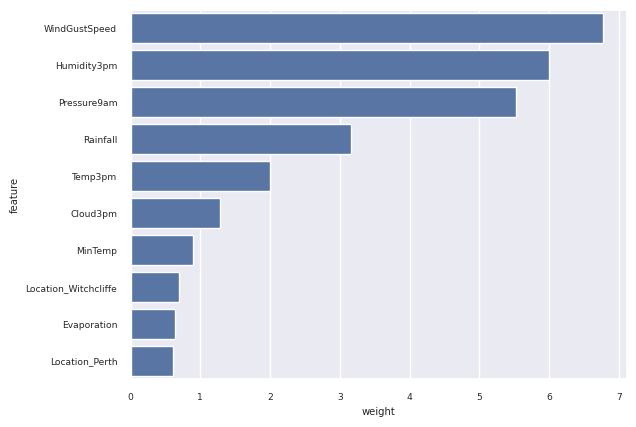

In [ ]:
sns.barplot(df1.sort_values('weight', ascending=False).head(10), x='weight', y='feature')

### Making Predictions and Evaluating the Model

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
train_predict = model.predict(X_train)
print(train_predict.tolist())

['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'N

In [ ]:
print(train_target.tolist())

['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',

In [ ]:
train_probs = model.predict_proba(X_train)
print(train_probs)
# [No, Yes]

[[0.94422113 0.05577887]
 [0.94068336 0.05931664]
 [0.96113957 0.03886043]
 ...
 [0.98755367 0.01244633]
 [0.98340691 0.01659309]
 [0.87507662 0.12492338]]


##### Calculating acuracy and errors in predicting model

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_target, train_predict)
# Currently model giving 85.1% accuracy on training data

0.8519920806629383

> Confusion Matrix

In [ ]:
#                        Predicted Negative   Predicted Positive
# Actual Negative (TN)   |        TN                FP
# Actual Positive (FN)   |        FN                TP


- In some scenario we want to reduce the False Negative and in some case we want to reduce False Positive
- In weather kind of predictions we have to avoid False Negatives so that people don't do work that can be affected by weather
- In Cancer kind of thing we should avoid False Positives before going to a surgery

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(train_target, train_predict, normalize='true')

array([[0.94625279, 0.05374721],
       [0.477475  , 0.522525  ]])

- Currently out model have large number of False Negatives so we should not be deciding some games to play or not based on this model prediction
- From this confusion matrix if it is not going to rain tommorow then the model is predicting with 94% accuracy
- But if it is not going to rain tommorow then model is not going to predict it efficiently, it is predicting 50-50 chances of rain tommorow

In [ ]:
def predict_rain(inputs, target):
  prediction = model.predict(inputs)
  acc = accuracy_score(target, prediction)
  print("accuracy is : ", acc)
  conf_mat = confusion_matrix(target, prediction, normalize='true')
  print("confusion matrix : ", conf_mat)

In [ ]:
predict_rain(X_train, train_target)

accuracy is :  0.8519920806629383
confusion matrix :  [[0.94625279 0.05374721]
 [0.477475   0.522525  ]]


In [ ]:
predict_rain(X_val, val_target)

accuracy is :  0.854058166071742
confusion matrix :  [[0.95833025 0.04166975]
 [0.53968698 0.46031302]]


In [ ]:
predict_rain(X_test, test_target)

accuracy is :  0.8418903150525088
confusion matrix :  [[0.94729696 0.05270304]
 [0.51793991 0.48206009]]


#### Comparing our model with a dumb or baseline model

In [ ]:
def random_guess(inputs):
  return np.random.choice(['Yes', 'No'], len(inputs))

In [ ]:
def always_no(inputs):
  return np.full(len(inputs), 'No')

In [ ]:
accuracy_score(val_target, random_guess(X_val))

0.4994440868394874

In [ ]:
accuracy_score(val_target, always_no(X_val))

0.7906255485985136

- Sometime it may happens that a dumb model is doing better than our trained model, so it is always good to compare our model with a doumb or baseline model

#### Make prediction on a Single Input

In [ ]:
new_input = {
  'Date': '2021-06-21',
  'Location': 'Katherine',
  'MinTemp': 14.6,
  'MaxTemp': 26.9,
  'Rainfall': 0.5,
  'Evaporation': np.nan,
  'Sunshine': np.nan,
  'WindGustDir': 'NNW',
  'WindGustSpeed': 40,
  'WindDir9am': 'W',
  'WindDir3pm': 'WNW',
  'WindSpeed9am': 24,
  'WindSpeed3pm': 22,
  'Humidity9am': 71,
  'Humidity3pm': 22,
  'Pressure9am': 1004.7,
  'Pressure3pm': 1004.1,
  'Cloud9am': 8.1,
  'Cloud3pm': np.nan,
  'Temp9am': 16.9,
  'Temp3pm': 21.8,
  'RainToday': 'Yes'
}


In [ ]:
input_df = pd.DataFrame([new_input])
input_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2021-06-21,Katherine,14.6,26.9,0.5,NaN,NaN,NNW,40,W,...,22,71,22,1004.7,1004.1,8.1,NaN,16.9,21.8,Yes


- Going to repeat the whole process to a single input that we have done to the whole set of input
1. Imputation of the missing value using imputer we created earlier
2. Scaling numerical feature using the scaler we created earlier
3. Encoding categorical features using the encoder we created earlier

In [ ]:
input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])

<ipython-input-106-742babc35bc6>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
<ipython-input-106-742babc35bc6>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
<ipython-input-106-742babc35bc6>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd

In [ ]:
X_new_input = input_df[numeric_cols + encoded_cols]
X_new_input

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,0.544811,0.59387,0.001348,0.066414,0.533604,0.263566,0.275862,0.252874,0.71,0.22,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
pred = model.predict(X_new_input)[0]
prob = model.predict_proba(X_new_input)[0]
pred, prob

('No', array([0.97746073, 0.02253927]))

### Saving and Loading Trained Models

In [ ]:
import joblib

In [ ]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

- It stores all the data of the model, imputer and all other thing on which it is trained and can be directly handed over to a software developer

In [ ]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [ ]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [ ]:
print(aussie_rain2)

{'model': LogisticRegression(solver='liblinear'), 'imputer': SimpleImputer(), 'scaler': MinMaxScaler(), 'encoder': OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False), 'input_cols': ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday'], 'target_col': 'RainTomorrow', 'categorical_cols': ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], 'encoded_cols': ['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launc

In [ ]:
print(aussie_rain2['model'].coef_.tolist())

[[0.8953545475666574, -2.8793023311767136, 3.1594648130445626, 0.6306820528270853, -1.6506576942214308, 6.76787723716948, -0.6528054672900266, -1.4224937310188304, 0.32335228520470277, 5.997990402709478, 5.518867973731302, -8.952997483060033, -0.16228895996355333, 1.2866481255539124, 0.4695804229150418, 2.002119481560587, 0.5975809091322645, -0.556955577568331, 0.47295866238642553, 0.002517727260667041, 0.342285099147859, -0.35668246518488156, 0.17701450842017405, 0.43671330174558026, -0.017073760315020243, 0.0251704325492529, 0.25589095657513095, -0.02254639391980504, -0.043684804501144515, -0.4861415027801935, -0.13976870605823796, -0.5769327587621782, -0.7886116003040532, -0.26212823526145035, -0.33055026930661446, -0.5705209453643949, 0.08025028815822767, 0.007185327004423, 0.0640978352085456, -0.9113231278082033, -0.45097283689695383, 0.0020944435454120607, -0.46549644875305474, -0.4665898149263997, -0.0718333153464716, 0.1885272850257433, 0.44644367577458577, 0.604783078005587, 0

In [ ]:
pred = aussie_rain2['model'].predict(X_test)
accuracy_score(test_target, pred)

0.8418903150525088

In [ ]:
!pip install jovian --upgrade --quiet
import jovian

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
jovian.commit(outputs=['aussie_rain.joblib'])

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
